In [8]:
import pandas as pd
import seaborn as sns

In [3]:
camaras = pd.read_parquet('da_camaras.parquet')

In [4]:
camaras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processo         10000 non-null  object
 1   status           10000 non-null  object
 2   classe           10000 non-null  object
 3   assunto          10000 non-null  object
 4   orgao_julgador   10000 non-null  object
 5   relator          10000 non-null  object
 6   origem           10000 non-null  object
 7   polo_mp          10000 non-null  object
 8   decision         10000 non-null  object
 9   unanimidade      10000 non-null  object
 10  data_publicacao  9999 non-null   object
 11  ementa           10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


In [5]:
camaras.relator.head(30)

0               MÁRIO DEVIENNE FERRAZ
1              ALBERTO ANDERSON FILHO
2              FERNANDO TORRES GARCIA
3               NELSON FONSECA JÚNIOR
4                     ALEX ZILENOVSKI
5                         PAULO ROSSI
6                        DAMIÃO COGAN
7     CÉSAR AUGUSTO ANDRADE DE CASTRO
8                      IVO DE ALMEIDA
9                        SÉRGIO RIBAS
10              NELSON FONSECA JÚNIOR
11             ALCIDES MALOSSI JUNIOR
12                        IVANA DAVID
13                  ALEXANDRE ALMEIDA
14                  JUSCELINO BATISTA
15     JOSÉ VITOR TEIXEIRA DE FREITAS
16                    WALTER DA SILVA
17                        PAULO ROSSI
18             LUIZ FERNANDO VAGGIONE
19                     WILLIAN CAMPOS
20                       FÁTIMA GOMES
21                       NUEVO CAMPOS
22             MIGUEL MARQUES E SILVA
23                      MENS DE MELLO
24                HERMANN HERSCHANDER
25                         ELY AMIOKA
26          

In [6]:
camaras.value_counts('relator')

relator
MENS DE MELLO                          163
CAMILO LÉLLIS                          151
MARCOS CORREA                          150
GILBERTO CRUZ                          147
IVANA DAVID                            144
                                      ... 
CHRISTIANO JORGE                         8
ERIKA SOARES DE AZEVEDO MASCARENHAS      8
KENARIK BOUJIKIAN                        5
LUÍS GERALDO LANFREDI                    3
NOGUEIRA NASCIMENTO                      1
Name: count, Length: 133, dtype: int64

Note que temos câmaras ordinárias e extraordinárias. O que são as câmaras extraordinárias? Elas ainda existem?

<Axes: xlabel='count', ylabel='orgao_julgador'>

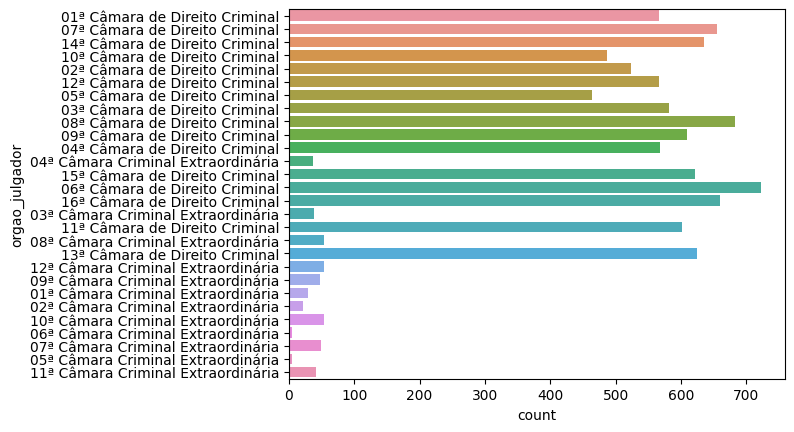

In [11]:
sns.countplot(data=camaras, y='orgao_julgador')

In [12]:
camaras.value_counts('orgao_julgador', normalize=True)

orgao_julgador
06ª Câmara de Direito Criminal        0.0723
08ª Câmara de Direito Criminal        0.0683
16ª Câmara de Direito Criminal        0.0660
07ª Câmara de Direito Criminal        0.0655
14ª Câmara de Direito Criminal        0.0636
13ª Câmara de Direito Criminal        0.0624
15ª Câmara de Direito Criminal        0.0621
09ª Câmara de Direito Criminal        0.0610
11ª Câmara de Direito Criminal        0.0601
03ª Câmara de Direito Criminal        0.0581
04ª Câmara de Direito Criminal        0.0568
12ª Câmara de Direito Criminal        0.0567
01ª Câmara de Direito Criminal        0.0566
02ª Câmara de Direito Criminal        0.0523
10ª Câmara de Direito Criminal        0.0487
05ª Câmara de Direito Criminal        0.0464
08ª Câmara Criminal Extraordinária    0.0054
10ª Câmara Criminal Extraordinária    0.0053
12ª Câmara Criminal Extraordinária    0.0053
07ª Câmara Criminal Extraordinária    0.0049
09ª Câmara Criminal Extraordinária    0.0047
11ª Câmara Criminal Extraordinária    0.

In [14]:
camaras_ordinarias = camaras[camaras.orgao_julgador.str.contains('Direito Criminal')]

In [15]:
camaras_ordinarias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9569 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processo         9569 non-null   object
 1   status           9569 non-null   object
 2   classe           9569 non-null   object
 3   assunto          9569 non-null   object
 4   orgao_julgador   9569 non-null   object
 5   relator          9569 non-null   object
 6   origem           9569 non-null   object
 7   polo_mp          9569 non-null   object
 8   decision         9569 non-null   object
 9   unanimidade      9569 non-null   object
 10  data_publicacao  9568 non-null   object
 11  ementa           9569 non-null   object
dtypes: object(12)
memory usage: 971.9+ KB


In [16]:
camaras_ordinarias.value_counts('orgao_julgador')

orgao_julgador
06ª Câmara de Direito Criminal    723
08ª Câmara de Direito Criminal    683
16ª Câmara de Direito Criminal    660
07ª Câmara de Direito Criminal    655
14ª Câmara de Direito Criminal    636
13ª Câmara de Direito Criminal    624
15ª Câmara de Direito Criminal    621
09ª Câmara de Direito Criminal    610
11ª Câmara de Direito Criminal    601
03ª Câmara de Direito Criminal    581
04ª Câmara de Direito Criminal    568
12ª Câmara de Direito Criminal    567
01ª Câmara de Direito Criminal    566
02ª Câmara de Direito Criminal    523
10ª Câmara de Direito Criminal    487
05ª Câmara de Direito Criminal    464
Name: count, dtype: int64

In [18]:
camaras_ordinarias.value_counts('polo_mp')

polo_mp
Passivo    8788
Ativo       781
Name: count, dtype: int64

In [19]:
camaras_ordinarias.value_counts('decision')

decision
Negaram                 5042
Parcialmente            3550
Provido                  686
Punibilidade Extinta     217
Outros                    59
Não conhecido             15
Name: count, dtype: int64

In [32]:
contagens = camaras_ordinarias \
  .value_counts(['polo_mp', 'decision']) \
  .reset_index() \
  .sort_values(['polo_mp', 'count'], ascending=[True, False])

contagens['prop'] = contagens['count'] / contagens.groupby('polo_mp')['count'].transform('sum')

contagens

,polo_mp,decision,count,prop
3,Ativo,Negaram,345,0.441741
4,Ativo,Provido,275,0.352113
6,Ativo,Parcialmente,144,0.184379
9,Ativo,Outros,11,0.014085
10,Ativo,Punibilidade Extinta,5,0.006402
11,Ativo,Não conhecido,1,0.001280
0,Passivo,Negaram,4697,0.534479
1,Passivo,Parcialmente,3406,0.387574
2,Passivo,Provido,411,0.046768
5,Passivo,Punibilidade Extinta,212,0.024124
